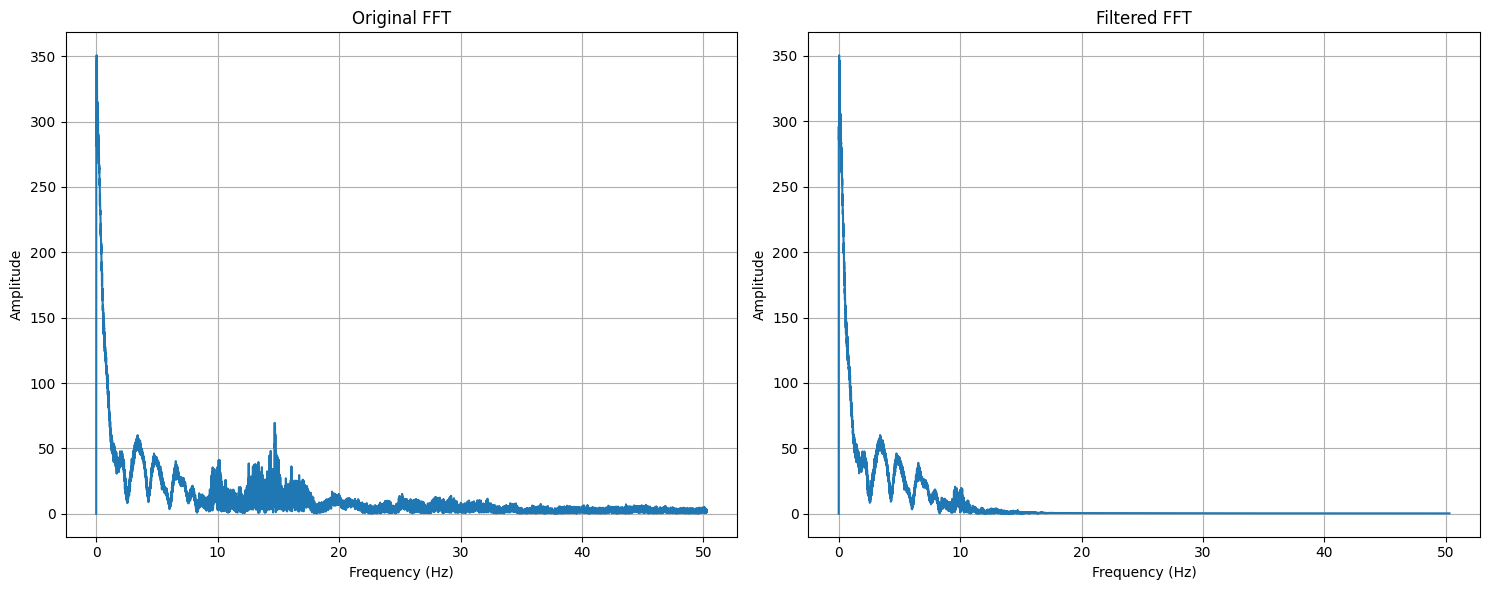

In [6]:
from scipy.signal import butter, filtfilt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

def read_and_combine_data(file_path):
    df = pd.read_csv(file_path)
    combined_waveform = np.sqrt(df['ax'].to_numpy()**2 + df['ay'].to_numpy()**2 + df['az'].to_numpy()**2)
    return df['time'].to_numpy(), combined_waveform

def perform_fft(time, waveform):
    sampling_rate = 1 / np.mean(np.diff(time))
    fft_waveform = fft(waveform)
    freq = np.fft.fftfreq(len(waveform), 1 / sampling_rate)
    positive_freq = freq[freq >= 0]
    fft_waveform_positive = fft_waveform[freq >= 0]
    fft_waveform_positive[0] = 0
    return positive_freq, fft_waveform_positive

# Main execution
file_path = 'data/sensor.csv'
time, combined_waveform = read_and_combine_data(file_path)
positive_freq, fft_waveform_positive = perform_fft(time, combined_waveform)

# Step 1: Define a function to implement a low-pass Butterworth filter
def butter_lowpass_filter(data, cutoff_freq, sampling_rate):
    b, a = butter(4, cutoff_freq / (0.5 * sampling_rate), btype='low')
    y = filtfilt(b, a, data)
    return y

# Step 2: Apply the low-pass filter to the combined waveform
cutoff_frequency = 10  # Cutoff frequency in Hz
sampling_rate = 1 / np.mean(np.diff(time))
filtered_waveform = butter_lowpass_filter(combined_waveform, cutoff_frequency, sampling_rate)

# Step 3: Perform FFT on the filtered waveform
positive_freq_filtered, fft_waveform_positive_filtered = perform_fft(time, filtered_waveform)

# Step 4: Compare the original and filtered frequency graphs
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(positive_freq, np.abs(fft_waveform_positive))
plt.title('Original FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(positive_freq_filtered, np.abs(fft_waveform_positive_filtered))
plt.title('Filtered FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()